In [74]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

result_dirs = ["results-no-pool", "results-with-pool"]
version_dic = {"results-no-pool": "V1", "results-with-pool": "V2"}
test_loads = {"1c":"N1", "5c":"N5", "50c":"N50"}
# test_loads = {"1c":"N1", "5c":"N5"}
curr_path = os.getcwd()
times = {}
for result_dir in result_dirs:
    result_dir_path = os.path.join(curr_path, result_dir)
    id = version_dic[result_dir].upper()
    times[id] = {}
    for num_clients in test_loads:
        curr_test_dir = os.path.join(result_dir_path, num_clients)
        load_id = test_loads[num_clients]
        times[id][load_id] = {}
#         times[id][load_id]["times"] = [] 
#         times[id][load_id]["median"]
        
        
        for file in os.listdir(curr_test_dir):
            attempt = file.split("-")
            attempt = attempt[1]
#             print(id, load_id, attempt)
            times[id][load_id][attempt] = {}
            total = 0
            aux_lst = []
            
            file_path = os.path.join(curr_test_dir, file)
            with open(file_path, "r") as f:
                lines = f.readlines()

                for l in lines:
                    mark = l.find(":")
                    time = float(l[(mark+2):].strip("\n"))
#                     print(time)
                    total += time
                    aux_lst.append(time)
#                     print(total)
#                     print(times)
            
        
            times[id][load_id][attempt]["times"] = aux_lst
            times[id][load_id][attempt]["total"] = total
        

In [76]:
# Getting median of tests
median_tests = dict()
for v in times:
    median_tests[v] = dict()
    for n in times[v]:
        totals_lst = []
        median_tests[v][n] = dict()
        for i in times[v][n]:
            totals_lst.append(times[v][n][i]["total"]) 
        totals_lst.sort()
        total_median = pd.DataFrame(totals_lst).median()[0]
        
        for i in times[v][n]:
            if times[v][n][i]["total"] == total_median:
                median_tests[v][n]["times"] = times[v][n][i]["times"]
                median_tests[v][n]["total"] = total_median
                break
        


In [77]:
df1 = pd.DataFrame(median_tests["V1"])
df2 = pd.DataFrame(median_tests["V2"])
# print(df1)
# print(df2)

print("Mediana de tempos V1 (em segundos) para cada N requests :\n")
print(df1.median())

print("Mediana de tempos V2 (em segundos) para cada N requests :\n")
print(df2.median())

Mediana de tempos V1 (em segundos) para cada N requests :

Series([], dtype: float64)
Mediana de tempos V2 (em segundos) para cada N requests :

Series([], dtype: float64)


In [78]:
v1_median_times = [df1[n]["total"] for n in df1]
v2_median_times = [df2[n]["total"] for n in df2]

print(v1_median_times)
print(v2_median_times)

[1.1024520397186, 17.780243396759097, 367.86168789863575]
[0.65135192871094, 16.9217722415924, 394.3068213462832]


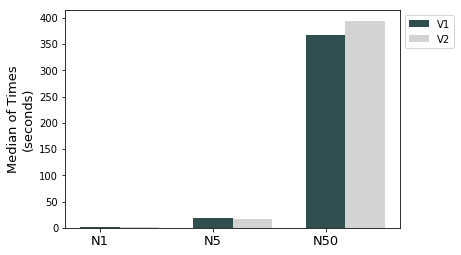

In [79]:
from matplotlib.font_manager import FontProperties

v1_median_times = [df1[n]["total"] for n in df1]
v2_median_times = [df2[n]["total"] for n in df2]

x_labels = ['N1','N5','N50']
bar_width = 0.35
x = [0,1,2]
x2 = []
for i in range(len(x)):
    x2.append(x[i] + bar_width)
    
font = {'fontname':'Times New Roman','size'   : 13 }

plt.ylabel('Median of Times\n(seconds)', **font)

p1 = plt.bar(x, v1_median_times, width = bar_width, color='#2f4f4f')
p2 = plt.bar(x2, v2_median_times, width = bar_width, color='#d3d3d3')
_ = plt.xticks(x, x_labels, **font)
# _ = plt.xticks(x, x_labels)

# fontP = FontProperties()
# fontP.set_size('small')

plt.legend((p1[0], p2[0]), ('V1', 'V2'), bbox_to_anchor=(1,1))

plt.show()

In [130]:
from matplotlib.font_manager import FontProperties

def plot_bars(n):
    n = str(n)
    v1_median_times = df1["N"+n]["total"]
    v2_median_times = df2["N"+n]["total"]
    
    x_labels = []
    bar_width = 0.35
    x = [0]
    x2 = []
    for i in range(len(x)):
        x2.append(x[i] + bar_width*2)

    font = {'fontname':'Times New Roman','size'   : 13 }

    plt.ylabel('Total time of the test\n(seconds)', **font)

    p1 = plt.bar(x, v1_median_times, width = bar_width, color='#d3d3d3')
    p2 = plt.bar(x2, v2_median_times, width = bar_width, color='#2f4f4f')
    _ = plt.xticks(x, x_labels, **font)
    # _ = plt.xticks(x, x_labels)

    # fontP = FontProperties()
    # fontP.set_size('small')

    plt.legend((p1[0], p2[0]), ('V1 - no pool', 'V2 - with pool'), bbox_to_anchor=(1,1))
    title = "Time to run all " + n + " clients"
    plt.title( title )
    plt.show()
    
    median_v1 = pd.DataFrame(df1["N"+n]["times"]).median()[0]
    median_v2 = pd.DataFrame(df2["N"+n]["times"]).median()[0]
    print("V1 - Time to run one client (median):", median_v1)
    print("V2 - Time to run one client (median):", median_v2)    

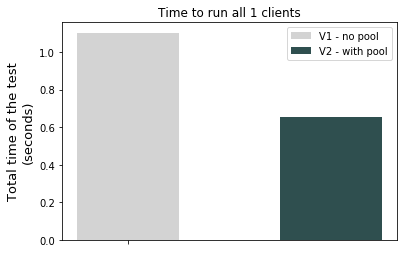

V1 - Time to run one client (median): 1.1024520397186
V2 - Time to run one client (median): 0.65135192871094


In [131]:
plot_bars(1)

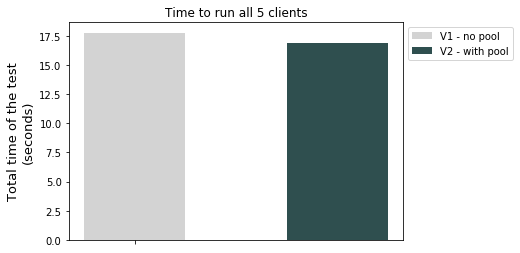

V1 - Time to run one client (median): 3.5563170909882
V2 - Time to run one client (median): 3.3846218585968


In [132]:
plot_bars(5)

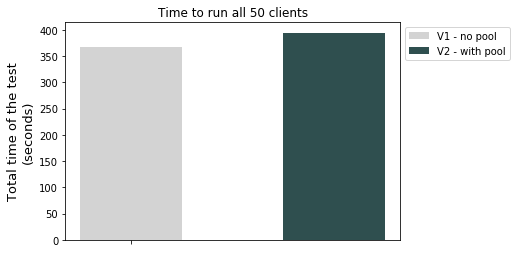

V1 - Time to run one client (median): 7.09844958782195
V2 - Time to run one client (median): 7.867704987525951


In [133]:
plot_bars(50)

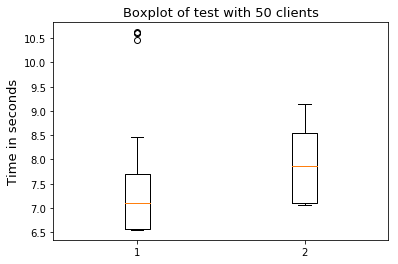

In [190]:
pd5_v1 = pd.Series(df1["N50"]["times"])
pd5_v2 = pd.Series(df2["N50"]["times"])
font = {'fontname':'Times New Roman','size': 13 }

plt.boxplot ([pd5_v1, pd5_v2])

title_boxplot = 'Boxplot of test with 50 clients'
plt.title(title_boxplot, **font)
plt.ylabel('Time in seconds', **font)
plt.suptitle('')
plt.show()

In [216]:
file_path = "/home/Marcelo/Documents/puc-tmp/ZeroBraneStudio-1.80/projects-marcelo/t2/tmp-worse-case-pool/no-shutdown-V2-N5.txt"
worst_case = []
total = 0
tmp = {}
with open(file_path, "r") as f:
    lines = f.readlines()

    for l in lines:
        mark = l.find(":")
        time = float(l[(mark+2):].strip("\n"))
        total += time
        worst_case.append(time)

tmp["times"] = worst_case
tmp["total"] = total
# no_shutdown = {"V2": {"N5": tmp}}
df_worst = pd.DataFrame(tmp)
# df_best = pd.DataFrame(df2["N5"])
# print(df_best["times"])
# print(df_best["times"])

In [225]:
v1_median_times = pd.DataFrame(df2["N5"]["times"]).median()[0]

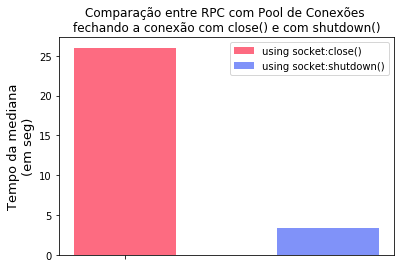

V1 - Time to run one client (median): 26.004794836044
V2 - Time to run one client (median): 3.3846218585968


In [232]:
n = 5
n = str(n)
v1_median_times = pd.DataFrame(df_worst["times"]).median()[0]
v2_median_times = pd.DataFrame(df2["N5"]["times"]).median()[0]

x_labels = []
bar_width = 0.35
x = [0]
x2 = []
for i in range(len(x)):
    x2.append(x[i] + bar_width*2)

font = {'fontname':'Times New Roman','size'   : 13 }

plt.ylabel('Tempo da mediana\n(em seg)', **font)

p1 = plt.bar(x, v1_median_times, width = bar_width, color='#fd6b81')
p2 = plt.bar(x2, v2_median_times, width = bar_width, color='#8092f9')
_ = plt.xticks(x, x_labels, **font)
# _ = plt.xticks(x, x_labels)

# fontP = FontProperties()
# fontP.set_size('small')

plt.legend((p1[0], p2[0]), ('using socket:close()', 'using socket:shutdown()'), bbox_to_anchor=(1,1))
title = "Comparação entre RPC com Pool de Conexões \nfechando a conexão com close() e com shutdown()"
plt.title( title )
plt.show()

# median_v1 = pd.DataFrame(df1["N"+n]["times"]).median()[0]
# median_v2 = pd.DataFrame(df2["N"+n]["times"]).median()[0]
print("V1 - Time to run one client (median):", v1_median_times)
print("V2 - Time to run one client (median):", v2_median_times)    